In [4]:
#To Handle Dataset
import pandas as pd
import numpy as np
from collections import defaultdict

#To make plots and Visualize the Data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#TO Build a ML Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error


##########     Reading the 2020 Report ##########################
df_2020=pd.read_csv('./2020.csv')

#There is no Happiness Rank in the Datset while Remaining Datasets Have. good part is data is ordered as per the Rank
df_2020['Happiness Rank'] =  range(1, len(df_2020.index)+1)

#Renaming the Columns so that all datasets have similar Header Names which will be Required later to Analyse Data from cumulative Years

df_2020 = df_2020.rename(columns = {'Country name' : 'Country', 'Ladder score' : 'Happiness Score', 
                        'Logged GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family', 
                                    'Healthy life expectancy' : 'Health (Life Expectancy)',
                        'Freedom to make life choices' : 'Freedom', 
                                    'Perceptions of corruption' : 'Trust (Government Corruption)'})

#Adding Year Column in order to differentiate data easily
df_2020['Year']=2020

##########     Reading the 2019 Report ##########################
df_2019 = pd.read_csv('./2019.csv')
df_2019['Year']=2019
df_2019 = df_2019.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom'
                                     , 'Perceptions of corruption' : 'Trust (Government Corruption)'})


##########     Reading the 2018 Report ##########################
df_2018 = pd.read_csv('./2018.csv')
df_2018['Year']=2018
df_2018 = df_2018.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)',
                                      'Freedom to make life choices' : 'Freedom',
                                      'Perceptions of corruption' : 'Trust (Government Corruption)'})

##########     Reading the 2017 Report ##########################
df_2017 = pd.read_csv('./2017.csv')
df_2017 = df_2017.rename(columns = {'Happiness.Rank':'Happiness Rank', 'Happiness.Score' : 'Happiness Score', 
                                      'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                                      'Trust..Government.Corruption.' : 'Trust (Government Corruption)', 'Dystopia.Residual' : 'Dystopia Residual'})
df_2017['Year']=2017

##########     Reading the 2016 Report ##########################
df_2016= pd.read_csv('./2016.csv')
df_2016['Year']=2016

##########     Reading the 2015 Report ##########################
df_2015 = pd.read_csv('./2015.csv')
df_2015['Year']=2015

##########  Concat all the Years Data into a single dataframe ##########################
df_all = pd.concat([df_2020,df_2019,df_2018,df_2017,df_2016,df_2015])

df_all=df_all[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                                   'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',
                                   'Generosity', 'Year']]
#Print Top 5 rows from the dataset
df_all.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Finland,1,7.8087,10.639267,0.954330,71.900825,0.949172,0.195445,-0.059482,2020
1,Denmark,2,7.6456,10.774001,0.955991,72.402504,0.951444,0.168489,0.066202,2020
2,Switzerland,3,7.5599,10.979933,0.942847,74.102448,0.921337,0.303728,0.105911,2020
3,Iceland,4,7.5045,10.772559,0.974670,73.000000,0.948892,0.711710,0.246944,2020
4,Norway,5,7.4880,11.087804,0.952487,73.200783,0.955750,0.263218,0.134533,2020


In [110]:
top= df_all.groupby('Country').sum().sort_values(by='Happiness Score',ascending=False).drop('Year', axis=1)[:50]
Least= df_all.groupby('Country').sum().sort_values(by='Happiness Score',ascending=False).drop('Year', axis=1)[-50:]

In [111]:
top.head()

,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),...,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Happiness Rank,Whisker.high,Whisker.low,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval,Standard Error
Country,,,,,,,,,,,,,,,,,,,,,
Finland,45.4977,0.031156,7.869766,7.747634,17.424069,8.126476,76.270003,4.056853,1.029431,2.187816,...,0.159670,0.477857,2.762835,19,7.527542,7.410458,7.875692,7.351,7.475,0.03140
Denmark,45.3756,0.033492,7.711245,7.579955,17.757644,8.194432,76.728749,4.081241,1.660582,2.315360,...,0.242793,0.495260,2.432741,13,7.581728,7.462272,7.545137,7.460,7.592,0.03328
Norway,45.1930,0.034837,7.556281,7.419719,18.684707,8.107860,77.567449,4.145993,1.779485,1.982972,...,0.287985,0.434101,2.168266,19,7.594445,7.479556,7.406987,7.421,7.575,0.03880
Switzerland,45.1169,0.035014,7.628528,7.491272,18.340752,8.029508,78.744039,4.024547,1.493070,2.202546,...,0.269056,0.407946,2.350267,21,7.561772,7.426227,7.488726,7.428,7.590,0.03411
Iceland,45.0595,0.059616,7.621347,7.387653,17.705172,8.438734,77.588722,4.039065,2.342564,1.412436,...,0.362330,0.144541,2.460688,20,7.622030,7.385970,7.856095,7.333,7.669,0.04884


In [3]:
import cufflinks as cf
cf.go_offline()
df_all.iplot(kind='scatter',x='Country',y='Health (Life Expectancy)')

# Will Trust in Government Show Great Impact on Happiness Score?

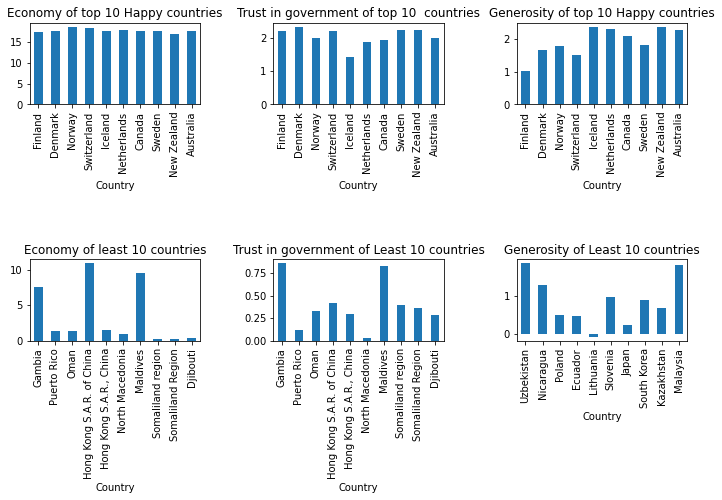

In [115]:
plt.figure(figsize=(10,8))

plt.subplot(3,3,1)
plt.title("Economy of top 10 Happy countries")
top['Economy (GDP per Capita)'][:10].plot(kind='bar')

plt.subplot(3,3,2)
plt.title("Trust in government of top 10  countries")
top['Trust (Government Corruption)'][:10].plot(kind='bar')

plt.subplot(3,3,3)
plt.title("Generosity of top 10 Happy countries")
top['Generosity'][:10].plot(kind='bar')

plt.subplot(3,3,4)
plt.title("Economy of least 10 countries")
Least['Economy (GDP per Capita)'][-10:].plot(kind='bar')


plt.subplot(3,3,5)
plt.title("Trust in government of Least 10 countries")
Least['Trust (Government Corruption)'][-10:].plot(kind='bar')

plt.subplot(3,3,6)
plt.title("Generosity of Least 10 countries")
top['Generosity'][-10:].plot(kind='bar')

plt.tight_layout(pad=0.3)

**Conclusion** - Economy is really good in the Countries with the High Overall Score Compared to Lower Happiness Scored Countries. 
Trust is almost average in the Top 10 Happiest Countries while the Least Happy Countries have Less Trust in their government. So this concludes the Trust in Government plays a important factor 

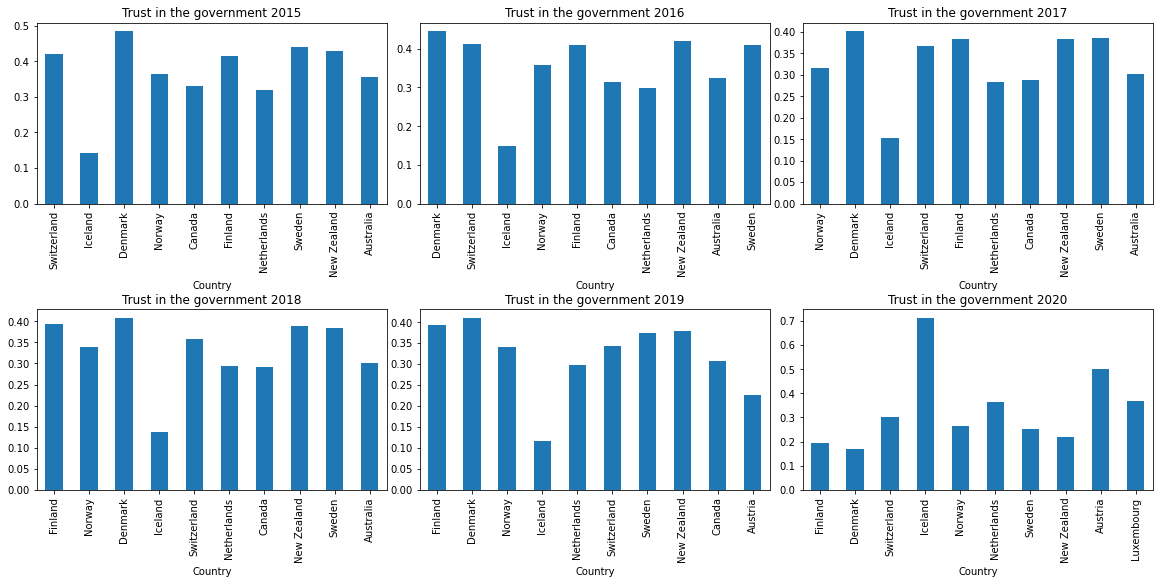

In [18]:
fig = plt.figure(figsize = (16, 8))
(ax1, ax2,ax3), (ax4,ax5, ax6) = fig.subplots(2,3)


ax1.set_title("Trust in the government 2015")
df_all[df_all['Year'] == 2015][['Country','Trust (Government Corruption)']][:10].set_index('Country').plot(kind='bar', ax=ax1, legend=False)

ax2.set_title("Trust in the government 2016")
df_all[df_all['Year'] == 2016][['Country','Trust (Government Corruption)']][:10].set_index('Country').plot(kind='bar', ax=ax2, legend=False)

ax3.set_title("Trust in the government 2017")
df_all[df_all['Year'] == 2017][['Country','Trust (Government Corruption)']][:10].set_index('Country').plot(kind='bar', ax=ax3, legend=False)

ax4.set_title("Trust in the government 2018")
df_all[df_all['Year'] == 2018][['Country','Trust (Government Corruption)']][:10].set_index('Country').plot(kind='bar', ax=ax4, legend=False)

ax5.set_title("Trust in the government 2019")
df_all[df_all['Year'] == 2019][['Country','Trust (Government Corruption)']][:10].set_index('Country').plot(kind='bar', ax=ax5, legend=False)

ax6.set_title("Trust in the government 2020")
df_all[df_all['Year'] == 2020][['Country','Trust (Government Corruption)']][:10].set_index('Country').plot(kind='bar', ax=ax6, legend=False)

plt.tight_layout(pad=0.3)

**Conclusion** - Trust in Government has been drstically decresed in Year 2020 compared to past 5 years.While Iceland has their Trust in government increasing over years

# Trend Analysis of different Features over time 

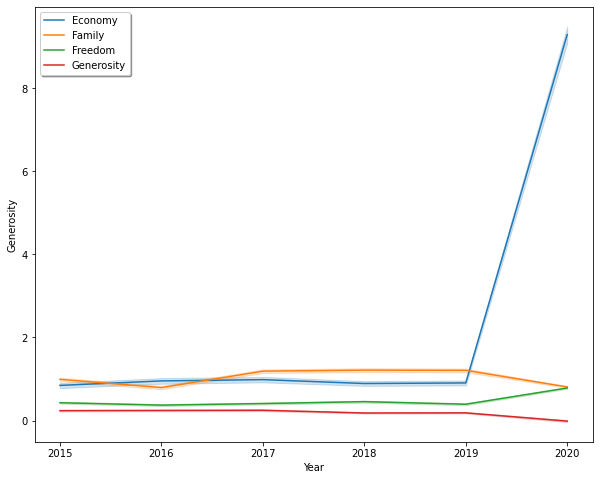

In [122]:
plt.figure(figsize=(10,8))
sns.lineplot(x = "Year", y = "Economy (GDP per Capita)", data=df_all, label='Economy')
sns.lineplot(x = "Year", y = "Family", data=df_all, label='Family')
sns.lineplot(x = "Year", y = "Freedom", data=df_all, label='Freedom')
sns.lineplot(x = "Year", y = "Generosity", data=df_all, label='Generosity')
#sns.lineplot(x = "Year", y = "Health (Life Expectancy)", data=df_all, label='Health')
plt.legend(shadow=True)

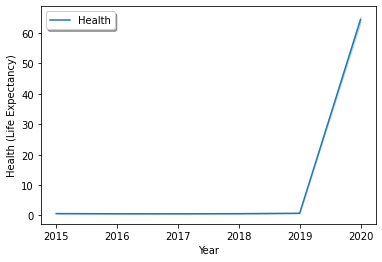

In [39]:
sns.lineplot(x = "Year", y = "Health (Life Expectancy)", data=df_all, label='Health')
plt.legend(shadow=True)

**Conclusion** - Economy is increasing over Years. While the Family Dependency and Generosity has been decresed in Year 2020 while there is a slight increase in Freedom to make Life Choices for people

In [34]:
top= df_all.groupby('Country').sum().sort_values(by='Generosity',ascending=False).drop('Year', axis=1)[:50]
top.head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Country,,,,,,,,
Myanmar,756,26.2230,11.051792,5.671503,61.224494,3.381657,1.576711,4.178329
Indonesia,506,31.5456,13.974601,6.464155,64.961865,3.201418,0.940834,3.193851
Thailand,251,37.4318,14.991860,7.451576,70.820484,3.731434,1.035085,2.727068
Haiti,837,23.0488,9.025640,3.674328,57.277356,0.984165,1.315149,2.642188
Malta,160,39.4428,16.962338,7.864611,76.595301,3.876268,1.416013,2.620586


In [50]:
df_2020.head()

,Country,Regional indicator,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Happiness Rank,Year
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,1,2020
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2,2020
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,3,2020
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,4,2020
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,5,2020


In [42]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [43]:
df_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


In [44]:
df_2017

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,2017


In [45]:
df_2018

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,2018
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,2018
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2018
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2018


In [46]:
df_2019

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019


In [61]:
d = df_all.groupby('Country').Region.apply(lambda s: s.mode()[0]).to_dict() 

df_all['Region'] = df_all.Region.fillna(df_all.language.map(d))


0                       Western Europe
1                       Western Europe
2                       Western Europe
3                       Western Europe
4                       Western Europe
                    ...               
125                 Sub-Saharan Africa
136                 Sub-Saharan Africa
139                 Sub-Saharan Africa
147                 Sub-Saharan Africa
155    Middle East and Northern Africa
Name: Region, Length: 797, dtype: object

In [77]:
df_all.head(20).groupby('Region').agg({'Country':'count'}).sort_values(by='Country',ascending=False)

,Country
Region,
Western Europe,13
North America and ANZ,4
Central and Eastern Europe,1
Latin America and Caribbean,1
Middle East and North Africa,1


In [78]:
df_all.to_csv('Region.csv')